In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
pca = PCA(svd_solver='auto')

In [3]:
for i in range(8):
    if i==0:
        train = pd.read_pickle('salida/nuevo4a/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4a/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            print(i+1)

In [4]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,0.987,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,27,0.333333,0,,0,,0.500000,YES
1,0.000000,0.000000,1.687,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,27,1.000000,0,,0,,0.333333,NO
2,1.878734,1.455456,1.962,2.178,3.867700,0.006142,0.465936,1,0.041667,0,5,1,24,0.800000,0,,0,,0.250000,UNKNOWN
3,0.000000,0.000000,2.097,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,38,1.000000,0,,0,,0.333333,YES
4,1.344579,1.449291,1.949,2.192,3.937175,0.005018,0.381601,0,0.076923,0,5,1,13,0.600000,0,,0,,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.624779,1.420225,1.900,1.805,3.849615,0.003770,0.329502,0,0.062500,0,5,1,16,0.200000,0,,0,,0.500000,UNKNOWN
796,0.000000,0.000000,1.995,0.000,0.000000,0.000000,0.000000,0,0.000000,0,9,0,23,1.000000,0,,0,,0.666667,YES
797,0.000000,0.000000,1.491,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,19,0.666667,0,,0,,0.500000,UNKNOWN
798,0.000000,0.000000,1.667,0.000,0.000000,0.000000,0.000000,0,0.000000,0,5,0,22,0.400000,0,,0,,1.000000,NO


In [5]:
train=train.drop(["verbH","verbT"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.000000,0.000000,0.987,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,27,0.333333,0,0,0.500000,YES
1,0.000000,0.000000,1.687,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,27,1.000000,0,0,0.333333,NO
2,1.878734,1.455456,1.962,2.178,3.867700,0.006142,0.465936,1,0.041667,0,5,1,24,0.800000,0,0,0.250000,UNKNOWN
3,0.000000,0.000000,2.097,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,38,1.000000,0,0,0.333333,YES
4,1.344579,1.449291,1.949,2.192,3.937175,0.005018,0.381601,0,0.076923,0,5,1,13,0.600000,0,0,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.624779,1.420225,1.900,1.805,3.849615,0.003770,0.329502,0,0.062500,0,5,1,16,0.200000,0,0,0.500000,UNKNOWN
796,0.000000,0.000000,1.995,0.000,0.000000,0.000000,0.000000,0,0.000000,0,9,0,23,1.000000,0,0,0.666667,YES
797,0.000000,0.000000,1.491,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,19,0.666667,0,0,0.500000,UNKNOWN
798,0.000000,0.000000,1.667,0.000,0.000000,0.000000,0.000000,0,0.000000,0,5,0,22,0.400000,0,0,1.000000,NO


In [6]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [7]:
# RTE3
y_t=[]
for i in y_:
    if i == "YES":
        y_t.append(1)
    elif i == "UNKNOWN":
        y_t.append(2)
    else:
        y_t.append(0)

In [8]:
# scaler = preprocessing.MaxAbsScaler().fit(X)
# X_scaled = scaler.transform(X)
# X = X_scaled

In [9]:
y_.unique()

array(['YES', 'NO', 'UNKNOWN'], dtype=object)

In [10]:
Y_pca = pca.fit_transform(X)

In [11]:
pca_vr=pca.explained_variance_ratio_
print(pca_vr)

[8.11063885e-01 1.16009106e-01 4.14076794e-02 1.93293895e-02
 5.73965302e-03 2.74308754e-03 9.82804010e-04 7.40089910e-04
 6.39475486e-04 5.53823041e-04 3.13257558e-04 2.67699899e-04
 8.05801212e-05 6.02548198e-05 5.02721748e-05 1.88662178e-05
 7.68342234e-08]


In [12]:
def distribucion_vr(D,titulo='Distribucion de Varianzas'):
    
    d=[]
    y=0
    for x in D:
        y+=x
        d.append(y)
    
    """Areas de Graficacion y visualizacion de los datos"""
    fig,ax = plt.subplots(figsize=(8,5))
    
    pasos=range(len(D))
    datos=np.array(list(map(lambda x,y:[x,y],pasos,d)))
    ax.plot(datos[:,0],datos[:,1],
            ls='--',
            color='green',
            linewidth=1,
            label='Contribucion acumulada')
    plt.title(titulo)
    plt.xlabel('Componente')
    plt.ylabel('Proporción')
    plt.grid(True)
    ax.xaxis.grid(True, which='minor')
    ax.yaxis.grid(True, which='minor')
    ax.grid(which='major', color='gray', linestyle='-')
    ax.grid(which='minor', color='grey', linestyle='--')
    ax.legend()

    return ax

<Axes: title={'center': 'Distribucion de Varianzas'}, xlabel='Componente', ylabel='Proporción'>

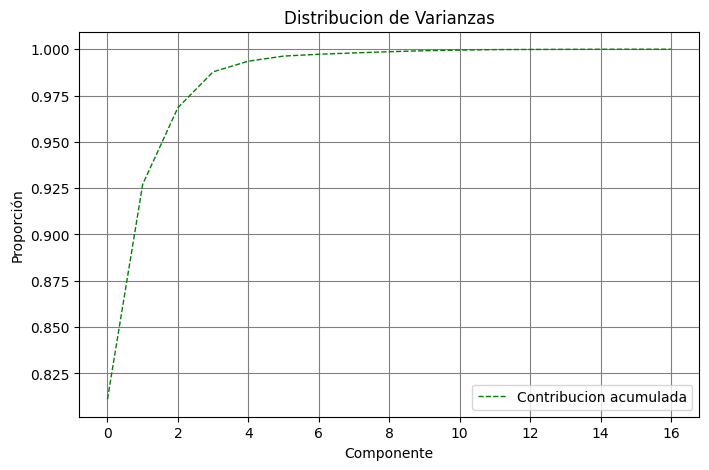

In [13]:
distribucion_vr(pca_vr)

In [14]:
pca_clases = PCA(n_components=2)

In [15]:
principalComponents=pca_clases.fit_transform(X)

In [16]:
principalComponents

array([[ 5.19025528, -4.14448059],
       [ 5.21729959, -3.47776792],
       [ 2.18715298,  0.14602722],
       ...,
       [-2.80335316, -4.23453745],
       [ 0.22746926, -3.57221048],
       [ 2.1820231 ,  0.03687136]])

In [17]:
principal_Df = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

# PCA vs LDA

In [18]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

In [19]:
len(y_)

800

In [20]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y_).transform(X)

In [21]:
# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

explained variance ratio (first two components): [0.81106388 0.11600911]


In [22]:
len(X_r)

800

In [23]:
len(X_r[y_ == i, 0])

412

<Figure size 640x480 with 0 Axes>

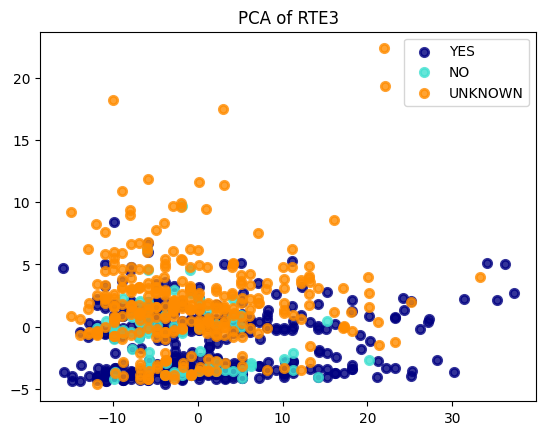

<Figure size 640x480 with 0 Axes>

In [24]:
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2
for color, i, target_name in zip(colors, y_.unique(), y_.unique()):
    plt.scatter(
        X_r[y_ == i, 0], X_r[y_ == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of RTE3")

plt.figure()

ValueError: x and y must be the same size

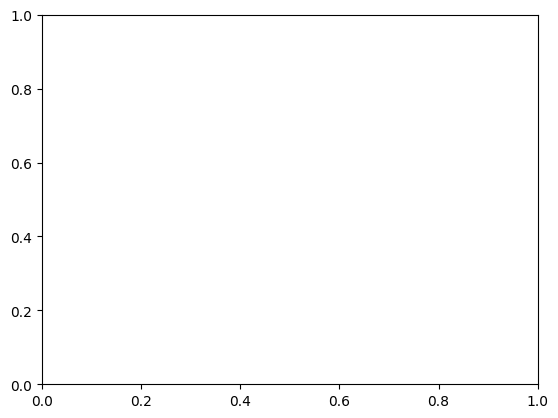

In [25]:
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2
for color, i, target_name in zip(colors, y_.unique(), y_.unique()):
    plt.scatter(
        X_r, y_t,color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of RTE3")

plt.figure()

Text(0.5, 1.0, 'LDA of RTE3')

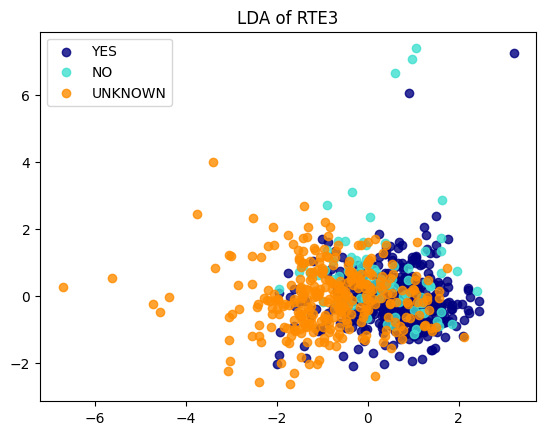

In [26]:
plt.figure()
for color, i, target_name in zip(colors, y_.unique(), y_.unique()):
    plt.scatter(
        X_r2[y_ == i, 0], X_r2[y_ == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of RTE3")

# Proyection 3d

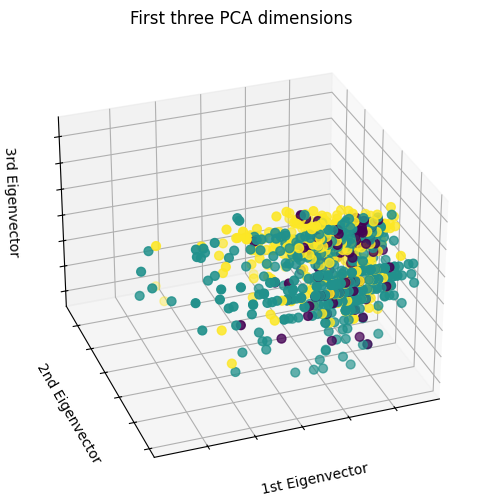

In [27]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y_t,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

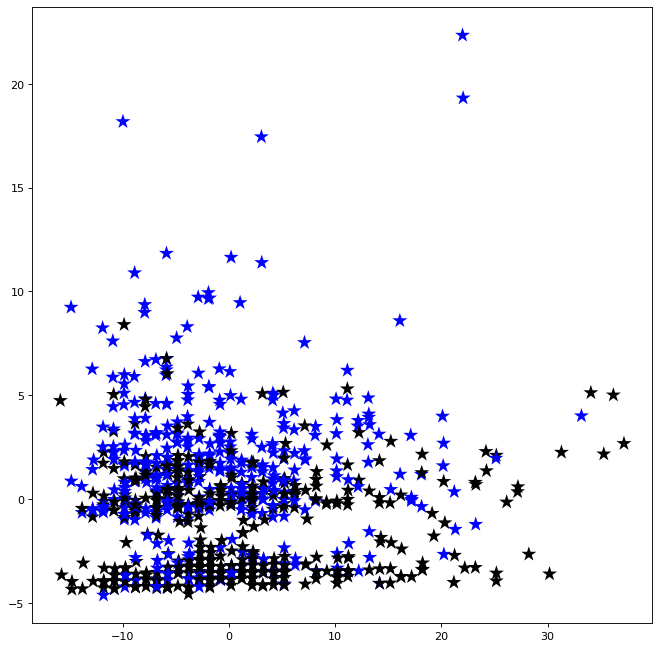

In [46]:
fig = plt.figure(figsize=(10,10), dpi=80)
ax1 = fig.add_subplot(111)

colors = ['black' if i==1 else 'blue' for i in y_t]
ax1.scatter(X_r[:,0],X_r[:,1], c=colors, s=200, marker='*', linewidth=0)
# plt.ylim(-1,1)
# plt.xlim(-1,1)
plt.show()

In [39]:
#X is the feature matrix, Y is the target matrix, x is the query point, tau is the bandwidth parameter.
def lwlr (X, Y, x, tau):
    X_T = np.transpose(X) #n*m feature matrix transposed
    m = len(X) #m=69 data points
    n = len(X[0,:]) #n=2 features
    reg = 0.0001 #regularization parameter
    g = np.ones(n) #initialize the gradient

    theta = np.zeros(n) #n*1 parameter matrix

    exp = -1* np.square( np.linalg.norm( np.zeros((m,2))+x - X, axis=1) / (2*tau*tau) )
    w = np.exp ( exp ) # m*1 weight matrix

    while(np.linalg.norm(g)> 1e-6):

        h = 1 / (1+ np.exp( -1* np.dot( X, theta ) )) #m*1 hypothesis matrix

        z = w*(Y-h)
        g = np.dot(X_T,z)-reg*theta #n*1 gradient

        D = np.diag( -1* w*h*(1-h))
        temp1=np.dot(X_T,D)
        H = np.dot(temp1,X)-reg*np.eye(n) #n*n Hessian matrix
        H_inv = np.linalg.inv(H)

        theta = theta - np.dot(H_inv,g)

    return int(np.dot(x,theta) > 0) #if the exponent is positive, h>0.5; if h>0.5 return 1!

In [49]:
#X is the feature matrix, Y is the target matrix tau is the bandwidth parameter
#resolution is the resolution of the model
def plot_lwlr (X, Y, tau, resolution):
    
    x0 = np.linspace(-1,1, num=resolution) #feature 0
    x1 = np.linspace(-1,1, num=resolution) #feature 1
    X_model = np.zeros((resolution*resolution,2))
    model = np.zeros(resolution*resolution)
    for i in range(0,resolution):
        for j in range(0,resolution):
            X_model[i*resolution+j] = [x0[i],x1[j]]
            model[i*resolution+j] = lwlr(X, Y, [x0[i],x1[j]], tau)
            
    fig = plt.figure(figsize=(10,10), dpi=80)
    ax1 = fig.add_subplot(111)

    colors = ['black' if i==1 else 'blue' for i in Y] #for the true data
    ax1.scatter(X[:,0],X[:,1], c=colors, s=200, marker='*', linewidth=0, alpha=1)

    colors_model = ['black' if i==0 else 'blue' for i in model] #for the model
    ax1.scatter(X_model[:,0],X_model[:,1], c=colors_model, s=130, marker='s', alpha=0.35, linewidth=0)


    plt.show()
    
    fraction = str(np.sum(model)/len(model)*100)    
    print("The graph is " + fraction + "% blue. The bandwidth parameter is " + str(tau))

/tmp/ipykernel_2563548/3275651941.py:16: RuntimeWarning: overflow encountered in exp
  h = 1 / (1+ np.exp( -1* np.dot( X, theta ) )) #m*1 hypothesis matrix


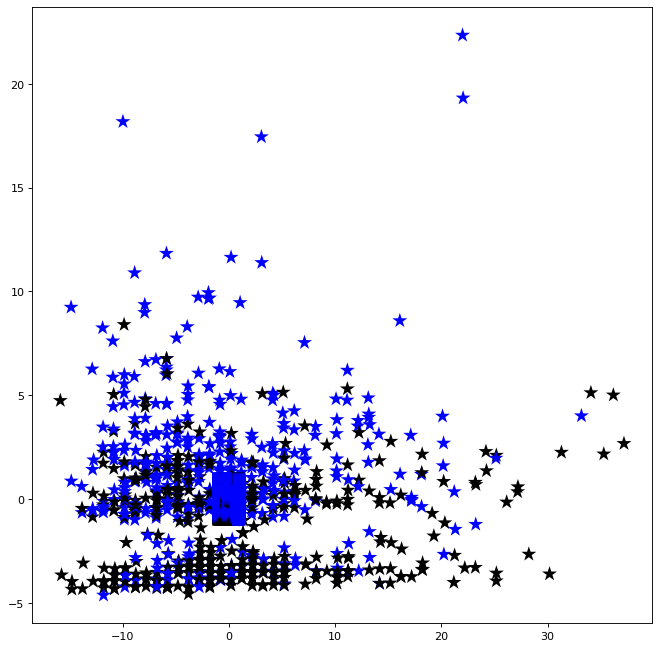

The graph is 84.48% blue. The bandwidth parameter is 0.1


In [50]:
plot_lwlr(X_r,y_t,0.1,50)